In [35]:
import json

# Load data from the JSON file
with open('50Q.json', 'r') as f:
    data = json.load(f)
    
solarPotential_data = data['solarPotential']
solarPotential_structure = {key: type(value).__name__ for key, value in solarPotential_data.items()}

In [36]:
for key, value in data.items():
    print(f"Key: {key}, Value Type: {type(value)}")

Key: name, Value Type: <class 'str'>
Key: center, Value Type: <class 'dict'>
Key: imageryDate, Value Type: <class 'dict'>
Key: postalCode, Value Type: <class 'str'>
Key: administrativeArea, Value Type: <class 'str'>
Key: statisticalArea, Value Type: <class 'str'>
Key: regionCode, Value Type: <class 'str'>
Key: solarPotential, Value Type: <class 'dict'>
Key: boundingBox, Value Type: <class 'dict'>
Key: imageryQuality, Value Type: <class 'str'>
Key: imageryProcessedDate, Value Type: <class 'dict'>


In [37]:
def explore_nested_dict(d, indent=0, max_samples=3):
    """Recursively explore nested dictionaries."""
    for key, value in d.items():
        print('  ' * indent + f"Key: {key}, Type: {type(value)}")
        
        if isinstance(value, dict):
            explore_nested_dict(value, indent + 1)
            
        elif isinstance(value, list):
            print('  ' * (indent + 1) + f"List Length: {len(value)}")
            
            # Show a few sample values
            samples = value[:max_samples]
            for i, sample in enumerate(samples):
                print('  ' * (indent + 1) + f"Sample {i+1}: {sample}")
                


# Start the exploration
print("Exploring 'solarPotential' Dictionary:")
explore_nested_dict(solarPotential_data)

Exploring 'solarPotential' Dictionary:
Key: maxArrayPanelsCount, Type: <class 'int'>
Key: maxArrayAreaMeters2, Type: <class 'float'>
Key: maxSunshineHoursPerYear, Type: <class 'int'>
Key: carbonOffsetFactorKgPerMwh, Type: <class 'float'>
Key: wholeRoofStats, Type: <class 'dict'>
  Key: areaMeters2, Type: <class 'float'>
  Key: sunshineQuantiles, Type: <class 'list'>
    List Length: 11
    Sample 1: 514
    Sample 2: 1013
    Sample 3: 1204
  Key: groundAreaMeters2, Type: <class 'float'>
Key: roofSegmentStats, Type: <class 'list'>
  List Length: 6
  Sample 1: {'pitchDegrees': 30.733656, 'azimuthDegrees': 266.58456, 'stats': {'areaMeters2': 80.44886, 'sunshineQuantiles': [544, 894, 1200, 1221, 1229, 1235, 1241, 1246, 1252, 1278, 1521], 'groundAreaMeters2': 69.15}, 'center': {'latitude': 42.2542113, 'longitude': -70.9628027}, 'boundingBox': {'sw': {'latitude': 42.2541204, 'longitude': -70.96283369999999}, 'ne': {'latitude': 42.2542924, 'longitude': -70.9627678}}, 'planeHeightAtCenterMete

In [38]:
# Assuming data has been loaded into a dictionary named `data` from your JSON file
solarPotential_data = data['solarPotential']

def get_sample_bounding_boxes(data):
    # Extract the 'roofSegmentStats' list
    roof_segment_stats = data.get('roofSegmentStats', [])
    
    # Create a list to hold the bounding boxes, azimuthDegrees, and centers
    samples = []

    # Loop through each segment in the roof segment stats
    for segment in roof_segment_stats:
        # Extract the required information
        bounding_box = segment.get('boundingBox', {})
        azimuth_degrees = segment.get('azimuthDegrees', None)
        center = segment.get('center', {})
        
        # Add the extracted information to the samples list
        samples.append({
            'boundingBox': bounding_box,
            'azimuthDegrees': azimuth_degrees,
            'center': center
        })
    
    return samples

# Call the function and store the result
sample_data = get_sample_bounding_boxes(solarPotential_data)

# For demonstration, print the results
for idx, sample in enumerate(sample_data):
    print(f"Sample {idx+1}:")
    print(f"Bounding Box: {sample['boundingBox']}")
    print(f"Azimuth Degrees: {sample['azimuthDegrees']}")
    print(f"Center: {sample['center']}")
    print()  # Just to add an empty line between samples


Sample 1:
Bounding Box: {'sw': {'latitude': 42.2541204, 'longitude': -70.96283369999999}, 'ne': {'latitude': 42.2542924, 'longitude': -70.9627678}}
Azimuth Degrees: 266.58456
Center: {'latitude': 42.2542113, 'longitude': -70.9628027}

Sample 2:
Bounding Box: {'sw': {'latitude': 42.2542265, 'longitude': -70.9627853}, 'ne': {'latitude': 42.254294699999996, 'longitude': -70.96274319999999}}
Azimuth Degrees: 85.3547
Center: {'latitude': 42.2542633, 'longitude': -70.9627656}

Sample 3:
Bounding Box: {'sw': {'latitude': 42.2541303, 'longitude': -70.9627763}, 'ne': {'latitude': 42.254198599999995, 'longitude': -70.96272809999999}}
Azimuth Degrees: 88.282814
Center: {'latitude': 42.2541653, 'longitude': -70.962754}

Sample 4:
Bounding Box: {'sw': {'latitude': 42.2541134, 'longitude': -70.962817}, 'ne': {'latitude': 42.254146399999996, 'longitude': -70.9627276}}
Azimuth Degrees: 177.24368
Center: {'latitude': 42.254128099999996, 'longitude': -70.9627699}

Sample 5:
Bounding Box: {'sw': {'latitu

In [39]:
import math

# Assuming `data` is your loaded JSON data
solarPotential_data = data['solarPotential']

# Initialize an empty list to hold the samples
samples = []

for segment in solarPotential_data['roofSegmentStats']:
    center_point = Point(segment['center']['latitude'], segment['center']['longitude'])
    azimuth = segment['azimuthDegrees']

    # Calculate displacement vectors for ne and sw points relative to the center point
    ne_displacement = (segment['boundingBox']['ne']['latitude'] - center_point.latitude,
                   segment['boundingBox']['ne']['longitude'] - center_point.longitude)
    sw_displacement = (segment['boundingBox']['sw']['latitude'] - center_point.latitude,
                   segment['boundingBox']['sw']['longitude'] - center_point.longitude)

    # Rotate displacement vectors by negative azimuth degree to align with azimuth 0
    azimuth_rad = math.radians(-azimuth)
    ne_displacement_rotated = (ne_displacement[0] * math.cos(azimuth_rad) - ne_displacement[1] * math.sin(azimuth_rad),
                               ne_displacement[0] * math.sin(azimuth_rad) + ne_displacement[1] * math.cos(azimuth_rad))
    sw_displacement_rotated = (sw_displacement[0] * math.cos(azimuth_rad) - sw_displacement[1] * math.sin(azimuth_rad),
                               sw_displacement[0] * math.sin(azimuth_rad) + sw_displacement[1] * math.cos(azimuth_rad))

    # Calculate the new ne and sw points by adding the rotated displacements to the center
    ne_new = (center_point.latitude + ne_displacement_rotated[0], center_point.longitude + ne_displacement_rotated[1])
    sw_new = (center_point.latitude + sw_displacement_rotated[0], center_point.longitude + sw_displacement_rotated[1])

    # Calculate width and height as the distance between the new ne and sw points
    width = geodesic(sw_new, (sw_new[0], ne_new[1])).meters
    height = geodesic(sw_new, (ne_new[0], sw_new[1])).meters

    # Add the sample to the list with azimuth degree set to 0
    samples.append({
        'center': segment['center'],
        'width': width,  # in meters
        'height': height,  # in meters
        'azimuthDegrees': segment['azimuthDegrees']  # azimuth degree set to 0
    })
print (samples[1]['center']['latitude'])


42.2542633


[{'center': {'latitude': 42.2541156, 'longitude': -70.9628192}, 'width': 3.813581711297943, 'height': 5.314519349071032, 'azimuthDegrees': 184.46716, 'corners': [Point(42.254146828222986, -70.96284878260114, 0.0), Point(42.254271242242666, -70.96285877746519, 0.0), Point(42.2542757717533, -70.96275661740538, 0.0), Point(42.254151357733726, -70.96274662254062, 0.0)]}, {'center': {'latitude': 42.2541156, 'longitude': -70.9628192}, 'width': 3.813581711297943, 'height': 5.314519349071032, 'azimuthDegrees': 184.46716, 'corners': [Point(42.254289127285716, -70.96273636031545, 0.0), Point(42.25424131837399, -70.9627311312735, 0.0), Point(42.25423747270525, -70.96279483968475, 0.0), Point(42.254285281617015, -70.96280006872638, 0.0)]}, {'center': {'latitude': 42.2541156, 'longitude': -70.9628192}, 'width': 3.813581711297943, 'height': 5.314519349071032, 'azimuthDegrees': 184.46716, 'corners': [Point(42.25419086358384, -70.9627212131554, 0.0), Point(42.254141241452686, -70.96271921067358, 0.0),

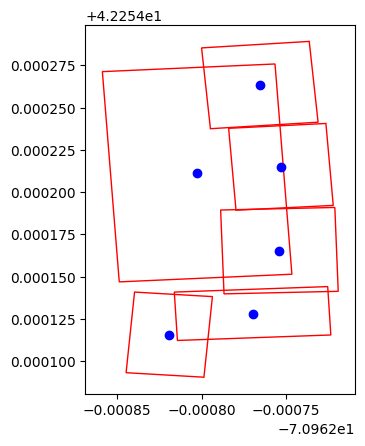

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from geopy.distance import geodesic
from geopy.point import Point

# Helper function to compute the offset given a center, distance, and bearing
def compute_offset(center, distance, bearing):
    return geodesic(meters=distance).destination(center, bearing)

# Function to compute the corners of a rectangle (solar panel) given the center, dimensions, and azimuth
def get_panel_corners(center, width, height, azimuth_degrees):
    center_point = Point(center['latitude'], center['longitude'])
    
    # Assuming the azimuth_degrees is pointing to the top of the panel
    # Calculate the top center point
    top_center = compute_offset(center_point, height / 2, azimuth_degrees)
    # Calculate the bottom center point
    bottom_center = compute_offset(center_point, height / 2, (azimuth_degrees + 180) % 360)
    
    # Calculate the corners
    top_left = compute_offset(top_center, width / 2, (azimuth_degrees + 270) % 360)
    top_right = compute_offset(top_center, width / 2, (azimuth_degrees + 90) % 360)
    bottom_right = compute_offset(bottom_center, width / 2, (azimuth_degrees + 90) % 360)
    bottom_left = compute_offset(bottom_center, width / 2, (azimuth_degrees + 270) % 360)
    
    return [top_left, top_right, bottom_right, bottom_left]

# Function to draw a polygon representing a panel on the plot
def draw_panel(ax, corners):
    polygon = patches.Polygon([(point.longitude, point.latitude) for point in corners], closed=True, edgecolor='r', fill=False)
    ax.add_patch(polygon)


# Set up the plot
fig, ax = plt.subplots()
ax.set_aspect('equal')

# Prepare lists to hold the latitude and longitude values for setting plot bounds
lats = []
longs = []

SegBox =[]
# Draw each sample on the plot
for sample in samples:
    corners = get_panel_corners(sample['center'], sample['width'], sample['height'], sample['azimuthDegrees'])
    draw_panel(ax, corners)
    # Add the sample to the list with azimuth degree set to 0
    SegBox.append({
        'center': segment['center'],
        'width': width,  # in meters
        'height': height,  # in meters
        'azimuthDegrees': segment['azimuthDegrees'],
        'corners': corners
    })
    # Append the corner coordinates to the lists
    lats += [corner.latitude for corner in corners]
    longs += [corner.longitude for corner in corners]

    # Plot the center of the panel
    ax.plot(sample['center']['longitude'], sample['center']['latitude'], 'bo')

print (SegBox)
# Set the bounds of the plot
margin = 0.00001  # Increase margin if necessary
ax.set_xlim(min(longs) - margin, max(longs) + margin)
ax.set_ylim(min(lats) - margin, max(lats) + margin)

# Show the plot
plt.show()


In [46]:
import folium
from geopy.distance import geodesic
from geopy.point import Point

# Using a CartoDB tileset for the map
tiles = 'https://{s}.basemaps.cartocdn.com/rastertiles/voyager/{z}/{x}/{y}{r}.png'

# Initialize the map with the CartoDB tileset and a high max_zoom
m = folium.Map(
    location=[42.3298, -71.0806],
    zoom_start=18,
    max_zoom=30,  # Set a very high max_zoom in case it's supported
    tiles=tiles,
    attr='© OpenStreetMap contributors, © CARTO'
)

# Helper function to compute the offset given a center, distance, and bearing
def compute_offset(center, distance, bearing):
    return geodesic(meters=distance).destination(center, bearing)

# Function to compute the corners of a rectangle (solar panel) given the center, dimensions, and azimuth
def get_panel_corners(center, width, height, azimuth_degrees):
    center_point = Point(center['latitude'], center['longitude'])
    top_center = compute_offset(center_point, height / 2, azimuth_degrees)
    bottom_center = compute_offset(center_point, height / 2, (azimuth_degrees + 180) % 360)
    top_left = compute_offset(top_center, width / 2, (azimuth_degrees + 270) % 360)
    top_right = compute_offset(top_center, width / 2, (azimuth_degrees + 90) % 360)
    bottom_right = compute_offset(bottom_center, width / 2, (azimuth_degrees + 90) % 360)
    bottom_left = compute_offset(bottom_center, width / 2, (azimuth_degrees + 270) % 360)
    return [top_left, top_right, bottom_right, bottom_left]

# Initialize the map with a sample center point
m = folium.Map(location=[samples[1]['center']['latitude'], samples[1]['center']['longitude']], zoom_start=30)

# Draw each sample on the map
for sample in samples:
    corners = get_panel_corners(sample['center'], sample['width'], sample['height'], sample['azimuthDegrees'])
    # Convert corners to a format that folium understands: [[lat, lon], [lat, lon], ...]
    corners = [(corner.latitude, corner.longitude) for corner in corners]
    # Create a Polygon with the corners and add it to the map
    folium.Polygon(
        locations=corners,
        color='blue',
        weight=2,
        fill=True,
        fill_color='blue',
        fill_opacity=0.3,
    ).add_to(m)

# Save the map to an HTML file
m



In [45]:
print (SegBox)

[{'center': {'latitude': 42.2541156, 'longitude': -70.9628192}, 'width': 3.813581711297943, 'height': 5.314519349071032, 'azimuthDegrees': 184.46716, 'corners': [Point(42.254146828222986, -70.96284878260114, 0.0), Point(42.254271242242666, -70.96285877746519, 0.0), Point(42.2542757717533, -70.96275661740538, 0.0), Point(42.254151357733726, -70.96274662254062, 0.0)]}, {'center': {'latitude': 42.2541156, 'longitude': -70.9628192}, 'width': 3.813581711297943, 'height': 5.314519349071032, 'azimuthDegrees': 184.46716, 'corners': [Point(42.254289127285716, -70.96273636031545, 0.0), Point(42.25424131837399, -70.9627311312735, 0.0), Point(42.25423747270525, -70.96279483968475, 0.0), Point(42.254285281617015, -70.96280006872638, 0.0)]}, {'center': {'latitude': 42.2541156, 'longitude': -70.9628192}, 'width': 3.813581711297943, 'height': 5.314519349071032, 'azimuthDegrees': 184.46716, 'corners': [Point(42.25419086358384, -70.9627212131554, 0.0), Point(42.254141241452686, -70.96271921067358, 0.0),

API Key obtained: eyJjaWQiOjI2OTYyMDcwLCJzIjoiMTY5OTU4MzkyNSIsInIiOjE4NCwicCI6WyJ1c2VyIl19
